# Project #1 - Regression Analysis and Making Predictions

Name: Ronaldo Aparecido de Oliveira                
ID: 300305192

## Part 1 - Dataset Preparation

### Step 1 - Importing and Cleaning the dataset

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
# read the file
df = pd.read_csv('df_merged.csv')

# delete the unused columns
delColumns = ['Unnamed: 0', 'Rank', 'Company', 'Domain', 'Back Links', 'Page Authority', 'Domain Authority', 'Moz Rank', 
              'Page Views', 'Domain Worth', 'Code Size', 'Text to Code Ratio', 'Opportunity Cost', 'Adwords Budget']
df.drop(delColumns, inplace=True, axis=1)

df.head()

,Revenue($m),Profits($m),Assets($m),Market Value($m),Employees,Alexa Rank,Semrush Rank,Organic Keywords,Organic Traffic,Adwords Keywords,Adwords Traffic
0,523964.0,14881,236495.0,321803.3,2200000,126,15.0,29145287.0,190314352.0,37053.0,3949947.0
1,280522.0,11588,225248.0,970680.1,798000,14,3.0,91384723.0,950416767.0,79995.0,2943519.0
2,264938.0,14340,362597.0,160696.3,74900,27230,NaN,NaN,NaN,NaN,NaN
3,260174.0,55256,338516.0,1112640.8,137000,51,20.0,17897033.0,159102793.0,15095.0,3382490.0
4,256776.0,6634,222449.0,77375.8,290000,31978,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(928, 11)

In [4]:
df.isnull().sum()

Revenue($m)           0
Profits($m)           0
Assets($m)            0
Market Value($m)      0
Employees             0
Alexa Rank            0
Semrush Rank        626
Organic Keywords    626
Organic Traffic     626
Adwords Keywords    626
Adwords Traffic     626
dtype: int64

In [5]:
# delete rows with missing values
df.dropna(how='any', axis=0, inplace=True)

df.shape

(302, 11)

In [6]:
df.isnull().sum()

Revenue($m)         0
Profits($m)         0
Assets($m)          0
Market Value($m)    0
Employees           0
Alexa Rank          0
Semrush Rank        0
Organic Keywords    0
Organic Traffic     0
Adwords Keywords    0
Adwords Traffic     0
dtype: int64

In [7]:
df.dtypes

Revenue($m)         float64
Profits($m)          object
Assets($m)          float64
Market Value($m)     object
Employees             int64
Alexa Rank            int64
Semrush Rank        float64
Organic Keywords    float64
Organic Traffic     float64
Adwords Keywords    float64
Adwords Traffic     float64
dtype: object

In [8]:
# converting the column 'Profits ($m)' from object type to float
df['Profits($m)'] = df['Profits($m)'].replace({'-(?!\d)': np.NaN}, regex=True)
df['Profits($m)'] = df['Profits($m)'].astype(float)

In [9]:
# converting the column 'Market Value ($m)' from object type to float
df['Market Value($m)'] = df['Market Value($m)'].replace({'-(?!\d)': np.NaN}, regex=True)
df['Market Value($m)'] = df['Market Value($m)'].astype(float)

In [10]:
df.isnull().sum()

Revenue($m)         0
Profits($m)         1
Assets($m)          0
Market Value($m)    6
Employees           0
Alexa Rank          0
Semrush Rank        0
Organic Keywords    0
Organic Traffic     0
Adwords Keywords    0
Adwords Traffic     0
dtype: int64

In [11]:
df.dropna(how='any', axis=0, inplace=True)
df.shape

(295, 11)

In [12]:
# Compute the 'average rank'
df['Average Rank'] = df['Alexa Rank'] + df['Semrush Rank']

In [13]:
df_final = df.copy()

### Step 2 - Exploring the dataset

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Creating a heatmap to show the correlations among the variables**

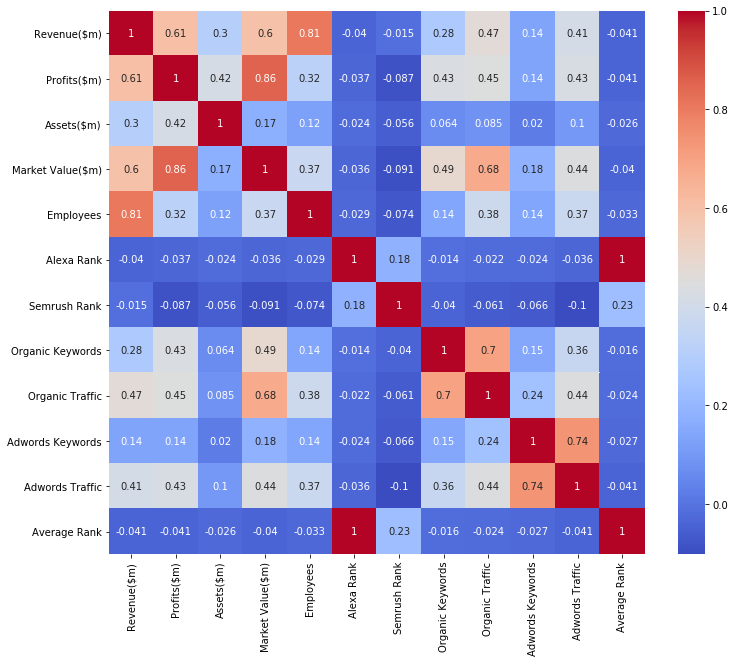

In [15]:
plt.figure(figsize=(12,10))
sns.heatmap(df_final.corr(), annot=True, cmap='coolwarm')
plt.show()

**Creating histograms of variables**

[]

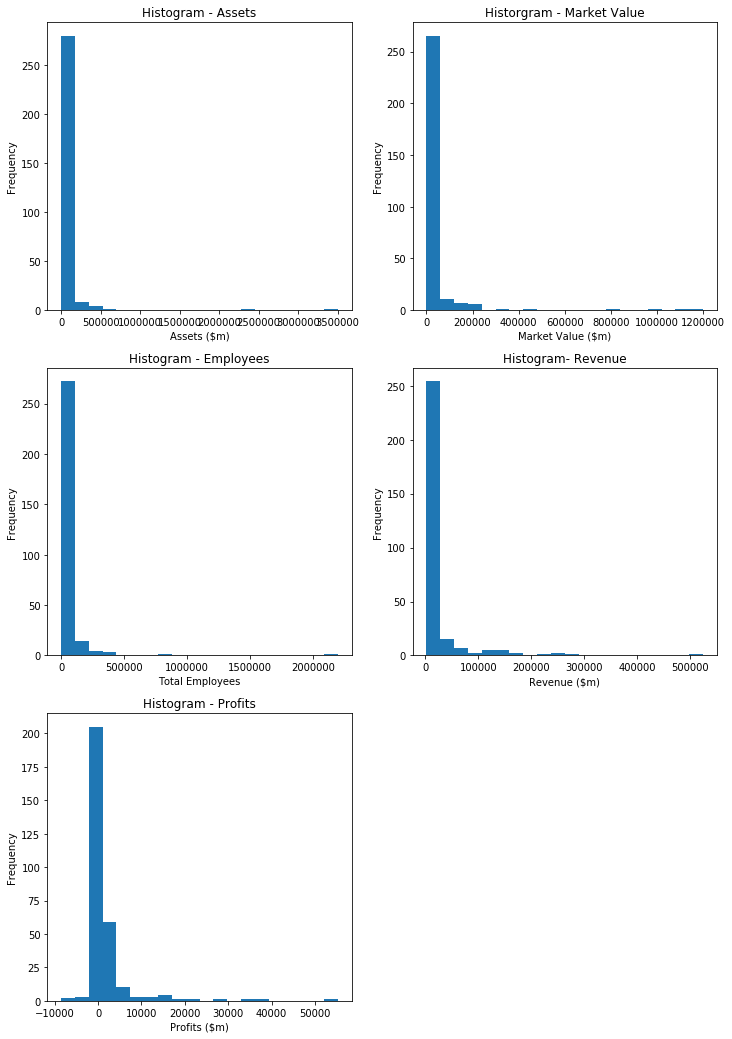

In [16]:
plt.figure(figsize=(12, 18))

plt.subplot(321)
plt.hist(data=df_final, x='Assets($m)', bins=20)
plt.title('Histogram - Assets')
plt.xlabel('Assets ($m)')
plt.ylabel('Frequency')

plt.subplot(322)
plt.hist(data=df_final, x='Market Value($m)', bins=20)
plt.title('Historgram - Market Value')
plt.xlabel('Market Value ($m)')
plt.ylabel('Frequency')

plt.subplot(323)
plt.hist(data=df_final, x='Employees', bins=20)
plt.title('Histogram - Employees')
plt.xlabel('Total Employees')
plt.ylabel('Frequency')

plt.subplot(324)
plt.hist(data=df_final, x='Revenue($m)', bins=20)
plt.title('Histogram- Revenue')
plt.xlabel('Revenue ($m)')
plt.ylabel('Frequency')

plt.subplot(325)
plt.hist(data=df_final, x='Profits($m)', bins=20)
plt.title('Histogram - Profits')
plt.xlabel('Profits ($m)')
plt.ylabel('Frequency')

plt.plot()

[]

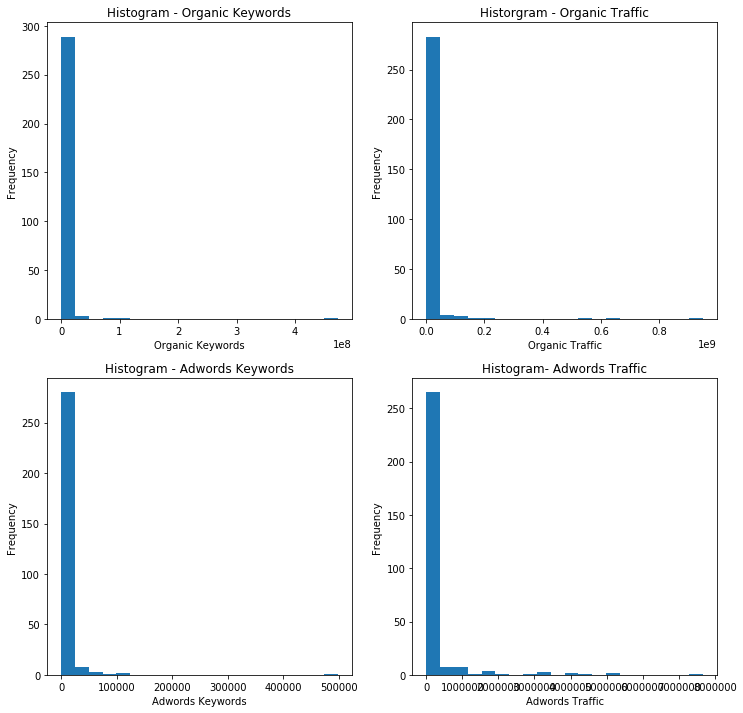

In [17]:
plt.figure(figsize=(12, 12))

plt.subplot(221)
plt.hist(data=df_final, x='Organic Keywords', bins=20)
plt.title('Histogram - Organic Keywords')
plt.xlabel('Organic Keywords')
plt.ylabel('Frequency')

plt.subplot(222)
plt.hist(data=df_final, x='Organic Traffic', bins=20)
plt.title('Historgram - Organic Traffic')
plt.xlabel('Organic Traffic')
plt.ylabel('Frequency')

plt.subplot(223)
plt.hist(data=df_final, x='Adwords Keywords', bins=20)
plt.title('Histogram - Adwords Keywords')
plt.xlabel('Adwords Keywords')
plt.ylabel('Frequency')

plt.subplot(224)
plt.hist(data=df_final, x='Adwords Traffic', bins=20)
plt.title('Histogram- Adwords Traffic')
plt.xlabel('Adwords Traffic')
plt.ylabel('Frequency')

plt.plot()

**Creating scatterplots related to outcome 'Revenue'**

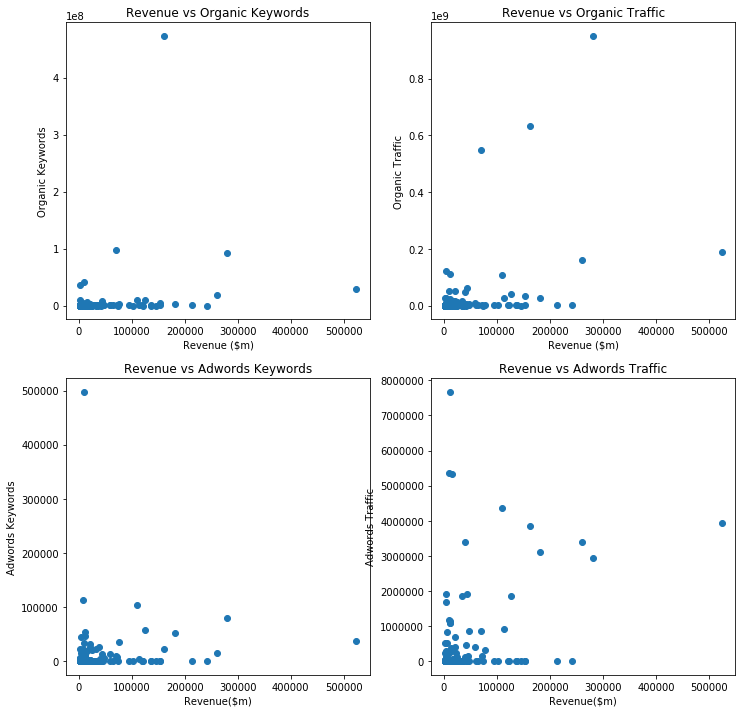

In [18]:
plt.figure(figsize=(12,12))

plt.subplot(221)
plt.scatter('Revenue($m)', 'Organic Keywords', data=df_final)
plt.title('Revenue vs Organic Keywords')
plt.xlabel('Revenue ($m)')
plt.ylabel('Organic Keywords')

plt.subplot(222)
plt.scatter('Revenue($m)', 'Organic Traffic', data=df_final)
plt.title('Revenue vs Organic Traffic')
plt.xlabel('Revenue ($m)')
plt.ylabel('Organic Traffic')

plt.subplot(223)
plt.scatter('Revenue($m)', 'Adwords Keywords', data=df_final)
plt.title('Revenue vs Adwords Keywords')
plt.xlabel('Revenue($m)')
plt.ylabel('Adwords Keywords')

plt.subplot(224)
plt.scatter('Revenue($m)', 'Adwords Traffic', data=df_final)
plt.title('Revenue vs Adwords Traffic')
plt.xlabel('Revenue($m)')
plt.ylabel('Adwords Traffic')

plt.show()

**Creating scatterplots related to outcome 'Profits'**

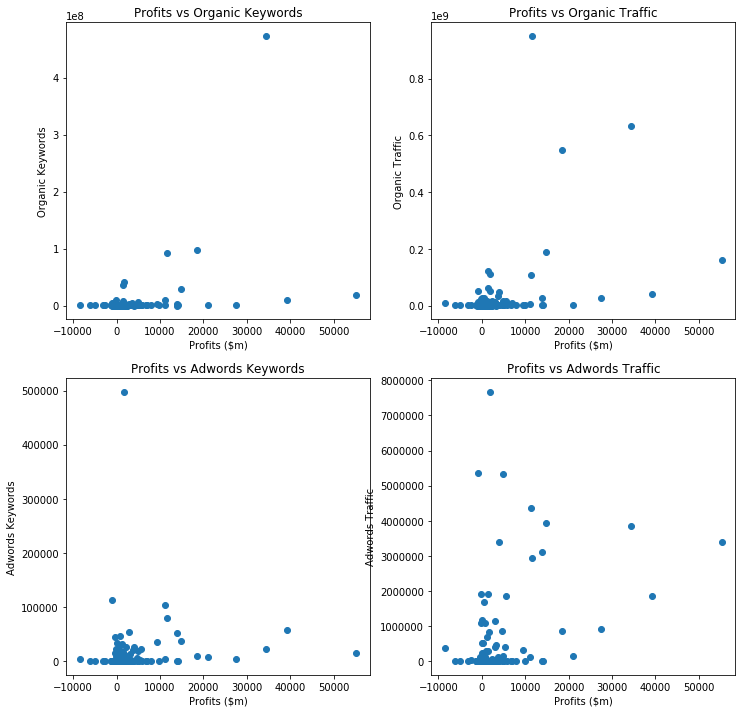

In [19]:
plt.figure(figsize=(12,12))

plt.subplot(221)
plt.scatter('Profits($m)', 'Organic Keywords', data=df_final)
plt.title('Profits vs Organic Keywords')
plt.xlabel('Profits ($m)')
plt.ylabel('Organic Keywords')

plt.subplot(222)
plt.scatter('Profits($m)', 'Organic Traffic', data=df_final)
plt.title('Profits vs Organic Traffic')
plt.xlabel('Profits ($m)')
plt.ylabel('Organic Traffic')

plt.subplot(223)
plt.scatter('Profits($m)', 'Adwords Keywords', data=df_final)
plt.title('Profits vs Adwords Keywords')
plt.xlabel('Profits ($m)')
plt.ylabel('Adwords Keywords')

plt.subplot(224)
plt.scatter('Profits($m)', 'Adwords Traffic', data=df_final)
plt.title('Profits vs Adwords Traffic')
plt.xlabel('Profits ($m)')
plt.ylabel('Adwords Traffic')

plt.show()

### Step 3 - Transforming the dataset

In [20]:
# Normalization using Min-Max
df_transformed = df_final.apply(lambda x: (x - min(x)) / (max(x) - min(x)))

# these values will be used in back transformation
organic_traffic_max = df_final['Organic Traffic'].max()
organic_traffic_min = df_final['Organic Traffic'].min()
adwords_traffic_max = df_final['Adwords Traffic'].max()
adwords_traffic_min = df_final['Adwords Traffic'].min()
assets_max = df_final['Assets($m)'].max()
assets_min = df_final['Assets($m)'].min()
revenue_max = df_final['Revenue($m)'].max()
revenue_min = df_final['Revenue($m)'].min()
profits_max = df_final['Profits($m)'].max()
profits_min = df_final['Profits($m)'].min()

In [21]:
df_transformed.head()

,Revenue($m),Profits($m),Assets($m),Market Value($m),Employees,Alexa Rank,Semrush Rank,Organic Keywords,Organic Traffic,Adwords Keywords,Adwords Traffic,Average Rank
0,1.000000,0.366786,0.067265,0.268269,1.000000,1.250000e-06,0.000004,0.061631,0.200243,0.074426,0.514793,1.350984e-06
1,0.533605,0.315141,0.064054,0.809203,0.362712,1.300000e-07,0.000000,0.193244,1.000000,0.160682,0.383626,1.192045e-07
3,0.494621,1.000000,0.096394,0.927549,0.062251,5.000000e-07,0.000006,0.037845,0.167403,0.030321,0.440837,6.556247e-07
6,0.460100,0.350444,0.049390,0.197202,0.147708,2.557900e-04,0.003614,0.000034,0.000141,0.000347,0.000378,3.632558e-04
7,0.406771,0.133936,0.016779,0.018209,0.031796,1.996400e-04,0.002004,0.000566,0.000468,0.000155,0.000031,2.588426e-04


In [22]:
df_transformed.describe()

,Revenue($m),Profits($m),Assets($m),Market Value($m),Employees,Alexa Rank,Semrush Rank,Organic Keywords,Organic Traffic,Adwords Keywords,Adwords Traffic,Average Rank
count,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000
mean,0.036805,0.160323,0.015688,0.030959,0.019414,0.007959,0.035021,0.006361,0.012585,0.011057,0.029956,0.008964
std,0.095190,0.085076,0.073341,0.106093,0.066673,0.058444,0.091623,0.060853,0.079627,0.063446,0.112425,0.058627
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.002011,0.135378,0.000972,0.001887,0.002679,0.000200,0.001462,0.000006,0.000011,0.000000,0.000000,0.000256
50%,0.007054,0.139652,0.002447,0.006322,0.005308,0.001510,0.011658,0.000028,0.000048,0.000000,0.000000,0.001929
75%,0.023440,0.152443,0.008170,0.017299,0.013159,0.005624,0.037863,0.000235,0.000470,0.000995,0.001125,0.006675
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Part 2 - Creating the Regression Models and Making the Predictions

**Why did we select just 'Assets', 'Organic Traffic' and 'Adwords Traffic' variables to create the models?**
<br/><br/> **Answer:** These variables were selected because the purpose of the study is to verify the efficiency of companies spending thousands of dollars on paid research. In other words, we want to evaluate the return level in terms of *revenue* and *profit* from the two search advertising strategies, organic search and paid search or adwords keywords, combined with the company's total assets. Thus, the variables 'organic traffic' were used to represent organic research, 'adwords traffic' for paid research and 'assets' for the company's assets.

In [23]:
# Values used to predict Revenue and Profit
X_predict = [[0.15, 0.21, 0.25]]

# Calculating the Actual Values
organic_traffic_actual = X_predict[0][0] * (organic_traffic_max - organic_traffic_min) + organic_traffic_min
adwords_traffic_actual = X_predict[0][1] * (adwords_traffic_max - adwords_traffic_min) + adwords_traffic_min
assets_actual = X_predict[0][2] * (assets_max - assets_min) + assets_min

### Step 1 - Analysis considering the outcome 'Revenue'

**Selecting the dataset to define the models**

In [24]:
colsToModel = ['Organic Traffic', 'Adwords Traffic', 'Assets($m)']

X = df_transformed[colsToModel]
y = df_transformed['Revenue($m)']

In [25]:
print('Shape X:', X.shape)
print('Shape y:', y.shape)

Shape X: (295, 3)
Shape y: (295,)


In [26]:
# defining the Training and Testing Datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

print('X_train: ', X_train.shape, '\nX_test: ', X_test.shape, '\ny_train: ', y_train.shape, '\ny_test: ', y_test.shape)

X_train:  (177, 3) 
X_test:  (118, 3) 
y_train:  (177,) 
y_test:  (118,)


**Creating the models from the dataset**

*Defining the Ordinary Least Squares (OLS) model*

In [27]:
# Ordinary Least Squares
import statsmodels.api as sm

X_train_ols = sm.add_constant(X_train)
ols = sm.OLS(y_train, X_train_ols)
ols_model = ols.fit()

print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:            Revenue($m)   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     35.29
Date:                Sun, 14 Jun 2020   Prob (F-statistic):           7.59e-18
Time:                        16:28:42   Log-Likelihood:                 179.85
No. Observations:                 177   AIC:                            -351.7
Df Residuals:                     173   BIC:                            -339.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0219      0.007     

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


*Defining the Linear Regression model*

In [28]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))

RMSE:  0.06815613891248742


*Defining the Ridge Regression model*

In [29]:
# Ridge Regression
from sklearn import linear_model

alphas = [1e-8, 1e-6, 1e-4, 0.01, 0.1, 0.1, 1, 5, 10, 25, 50, 100, 1000, 1e4]

ridge_prelim = linear_model.RidgeCV(alphas=alphas, store_cv_values=True)
ridge_prelim = ridge_prelim.fit(X_train, y_train)

print('Best alpha: ', ridge_prelim.alpha_)

Best alpha:  1.0


In [30]:
ridge_model = linear_model.Ridge(alpha=ridge_prelim.alpha_)
ridge_model = ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)))

RMSE:  0.0604903056519413


*Defining the Lasso Regression model*

In [31]:
# Lasso Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

lasso_prelim = Lasso()

parameters = {'alpha': [1e-8, 1e-6, 1e-4, 0.01, 0.1, 0.1, 1, 5, 10, 25, 50, 100, 1000, 1e4]}

lasso_prelim = GridSearchCV(lasso_prelim, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_prelim = lasso_prelim.fit(X_train, y_train)

print('Best alpha: ', lasso_prelim.best_params_)

Best alpha:  {'alpha': 0.01}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [32]:
lasso_model = Lasso(alpha=lasso_prelim.best_params_.get('alpha'))
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, lasso_pred)))

RMSE:  0.06386620822998233


### Step 2 - Making Predictions to 'Revenue'

In [33]:
y_pred_lr = lr_model.predict(X_predict)
y_pred_ridge = ridge_model.predict(X_predict)
y_pred_lasso = lasso_model.predict(X_predict)

revenue_y_pred = [#y_pred_ols, 
    y_pred_lr[0], y_pred_ridge[0], y_pred_lasso[0]]

print(revenue_y_pred)

[0.23172794497434865, 0.16673828765221801, 0.04152799712039917]


In [34]:
# Determining the Actual Revenues
revenue_actual_lr = y_pred_lr[0] * (revenue_max - revenue_min) + revenue_min
revenue_actual_ridge = y_pred_ridge[0] * (revenue_max - revenue_min) + revenue_min
revenue_actual_lasso = y_pred_lasso[0] * (revenue_max - revenue_min) + revenue_min

revenue_pred = [#revenue_actual_ols, 
    revenue_actual_lr, revenue_actual_ridge, revenue_actual_lasso]

print(revenue_pred)

[122952.87679853589, 89030.55031438997, 23675.16101694915]


### Step 3 - Analysis considering the outcome 'Profits'

**Selecting the dataset to define the models**

In [35]:
colsToModel = ['Organic Traffic', 'Adwords Traffic', 'Assets($m)']

X = df_transformed[colsToModel]
y = df_transformed['Profits($m)']

In [36]:
print('Shape X:', X.shape)
print('Shape y:', y.shape)

Shape X: (295, 3)
Shape y: (295,)


In [37]:
# defining the Training and Testing Datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

print('X_train: ', X_train.shape, '\nX_test: ', X_test.shape, '\ny_train: ', y_train.shape, '\ny_test: ', y_test.shape)

X_train:  (177, 3) 
X_test:  (118, 3) 
y_train:  (177,) 
y_test:  (118,)


**Creating the models from the dataset**

*Defining the Ordinary Least Squares (OLS) model*

In [38]:
# Ordinary Least Squares
import statsmodels.api as sm

X_train_ols = sm.add_constant(X_train)
ols = sm.OLS(y_train, X_train_ols)
ols_model = ols.fit()

print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:            Profits($m)   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     43.50
Date:                Sun, 14 Jun 2020   Prob (F-statistic):           5.32e-21
Time:                        16:28:42   Log-Likelihood:                 237.85
No. Observations:                 177   AIC:                            -467.7
Df Residuals:                     173   BIC:                            -455.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1432      0.005     

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


*Defining the Linear Regression model*

In [39]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))

RMSE:  0.07457812225892614


*Defining the Ridge Regression model*

In [40]:
# Ridge Regression
from sklearn import linear_model

alphas = [1e-8, 1e-6, 1e-4, 0.01, 0.1, 0.1, 1, 5, 10, 25, 50, 100, 1000, 1e4]

ridge_prelim = linear_model.RidgeCV(alphas=alphas, store_cv_values=True)
ridge_prelim = ridge_prelim.fit(X_train, y_train)

print('Best alpha: ', ridge_prelim.alpha_)

Best alpha:  1.0


In [41]:
ridge_model = linear_model.Ridge(alpha=ridge_prelim.alpha_)
ridge_model = ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)))

RMSE:  0.07506401279286484


*Defining the Lasso Regression model*

In [42]:
# Lasso Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

lasso_prelim = Lasso()

parameters = {'alpha': [1e-8, 1e-6, 1e-4, 0.01, 0.1, 0.1, 1, 5, 10, 25, 50, 100, 1000, 1e4]}

lasso_prelim = GridSearchCV(lasso_prelim, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_prelim = lasso_prelim.fit(X_train, y_train)

print('Best alpha: ', lasso_prelim.best_params_)

Best alpha:  {'alpha': 0.01}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [43]:
lasso_model = Lasso(alpha=lasso_prelim.best_params_.get('alpha'))
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, lasso_pred)))

RMSE:  0.08689192248007661


### Step 4 - Making Predictions to 'Profits'

In [44]:
y_pred_lr = lr_model.predict(X_predict)
y_pred_ridge = ridge_model.predict(X_predict)
y_pred_lasso = lasso_model.predict(X_predict)

profits_y_pred = [#y_pred_ols, 
    y_pred_lr[0], y_pred_ridge[0], y_pred_lasso[0]]

print(profits_y_pred)

[0.3245912774954929, 0.26524185816619245, 0.15973496602921494]


In [45]:
# Determining the Actual Profits
profits_actual_lr = y_pred_lr[0] * (profits_max - profits_min) + profits_min
profits_actual_ridge = y_pred_ridge[0] * (profits_max - profits_min) + profits_min
profits_actual_lasso = y_pred_lasso[0] * (profits_max - profits_min) + profits_min

profits_pred = [#profits_actual_ols, 
    profits_actual_lr, profits_actual_ridge, profits_actual_lasso]

print(profits_pred)

[12190.589035667617, 8406.351360392764, 1679.0209039548026]


## Part 3 - Results Summary

In [48]:
print('OUTPUT transformed REVENUE\n')
print('Linear Regression    : ', revenue_y_pred[0])
print('Ridge Regression(*)  : ', revenue_y_pred[1])
print('Lasso Regression     : ', revenue_y_pred[2])
print('\nOUTPUT actual REVENUE\n')
print('Linear Regression    : ', revenue_pred[0])
print('Ridge Regression(*)  : ', revenue_pred[1])
print('Lasso Regression     : ', revenue_pred[2])

OUTPUT transformed REVENUE

Linear Regression    :  0.23172794497434865
Ridge Regression(*)  :  0.16673828765221801
Lasso Regression     :  0.04152799712039917

OUTPUT actual REVENUE

Linear Regression    :  122952.87679853589
Ridge Regression(*)  :  89030.55031438997
Lasso Regression     :  23675.16101694915


In [49]:
print('OUTPUT transformed PROFIT\n')
print('Linear Regression(*) : ', profits_y_pred[0])
print('Ridge Regression     : ', profits_y_pred[1])
print('Lasso Regression     : ', profits_y_pred[2])
print('\nOUTPUT actual PROFIT\n')
print('Linear Regression(*) : ', profits_pred[0])
print('Ridge Regression     : ', profits_pred[1])
print('Lasso Regression     : ', profits_pred[2])

OUTPUT transformed PROFIT

Linear Regression(*) :  0.3245912774954929
Ridge Regression     :  0.26524185816619245
Lasso Regression     :  0.15973496602921494

OUTPUT actual PROFIT

Linear Regression(*) :  12190.589035667617
Ridge Regression     :  8406.351360392764
Lasso Regression     :  1679.0209039548026


In [51]:
print('FINAL RESULTS')
print('Revenue Forecasted (from Ridge Model) : ', revenue_pred[1])
print('Provit Forecasted (from OLS Model)    : ', profits_pred[0])

FINAL RESULTS
Revenue Forecasted (from Ridge Model) :  89030.55031438997
Provit Forecasted (from OLS Model)    :  12190.589035667617
